In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("../data/merged/merged_data.csv")

In [16]:
def create_datetime(row):
    date = row["date"]
    time = row["hour"]
    date = f"{date.split('.')[0]}-{date.split('.')[1]}-{date.split('.')[2]} {time.split(':')[0]}:{time.split(':')[1]}:00"
    row["date"] = date

    return row

In [20]:
df = df.apply(create_datetime, axis=1)

In [22]:
df["date"] = pd.to_datetime(df["date"])

In [23]:
df

,date,hour,open,high,close,min
0,2022-01-02 17:03:00,17:03,1.13690,1.13690,1.13690,1.13690
1,2022-01-02 17:04:00,17:04,1.13689,1.13689,1.13689,1.13689
2,2022-01-02 17:05:00,17:05,1.13692,1.13692,1.13692,1.13692
3,2022-01-02 17:06:00,17:06,1.13668,1.13671,1.13652,1.13652
4,2022-01-02 17:07:00,17:07,1.13655,1.13692,1.13649,1.13682
...,...,...,...,...,...,...
1949993,2023-03-31 16:54:00,16:54,1.08424,1.08428,1.08420,1.08428
1949994,2023-03-31 16:55:00,16:55,1.08430,1.08438,1.08423,1.08423
1949995,2023-03-31 16:56:00,16:56,1.08425,1.08433,1.08416,1.08417
1949996,2023-03-31 16:57:00,16:57,1.08416,1.08419,1.08409,1.08413


In [26]:
df = df.sort_values(by=["date"])

In [27]:
df[(df["date"].dt.hour % 1 == 0) & (df["date"].dt.minute == 0)]

,date,hour,open,high,close,min
745200,2018-01-01 17:00:00,17:00,1.20037,1.20100,1.20037,1.20100
745259,2018-01-01 18:00:00,18:00,1.20139,1.20139,1.20114,1.20117
745319,2018-01-01 19:00:00,19:00,1.20106,1.20108,1.20093,1.20096
745379,2018-01-01 20:00:00,20:00,1.20160,1.20171,1.20156,1.20171
745439,2018-01-01 21:00:00,21:00,1.20154,1.20160,1.20154,1.20159
...,...,...,...,...,...,...
1869303,2023-04-14 09:00:00,09:00,1.10344,1.10363,1.10328,1.10353
1869363,2023-04-14 10:00:00,10:00,1.10298,1.10298,1.10052,1.10092
1869423,2023-04-14 13:00:00,13:00,1.09775,1.09777,1.09763,1.09763
1869483,2023-04-14 14:00:00,14:00,1.09871,1.09887,1.09871,1.09887


In [28]:
df["DENOISED"] = df["close"].ewm(alpha=0.01).mean()

In [29]:
df

,date,hour,open,high,close,min,DENOISED
745200,2018-01-01 17:00:00,17:00,1.20037,1.20100,1.20037,1.20100,1.200370
745201,2018-01-01 17:01:00,17:01,1.20083,1.20095,1.20017,1.20030,1.200269
745202,2018-01-01 17:02:00,17:02,1.20035,1.20043,1.20035,1.20043,1.200297
745203,2018-01-01 17:03:00,17:03,1.20041,1.20050,1.20031,1.20046,1.200300
745204,2018-01-01 17:04:00,17:04,1.20049,1.20049,1.20046,1.20048,1.200333
...,...,...,...,...,...,...,...
1869597,2023-04-14 16:54:00,16:54,1.09939,1.09950,1.09938,1.09949,1.099834
1869598,2023-04-14 16:55:00,16:55,1.09947,1.09947,1.09934,1.09938,1.099829
1869599,2023-04-14 16:56:00,16:56,1.09937,1.09944,1.09934,1.09938,1.099824
1869600,2023-04-14 16:57:00,16:57,1.09939,1.09944,1.09937,1.09937,1.099820


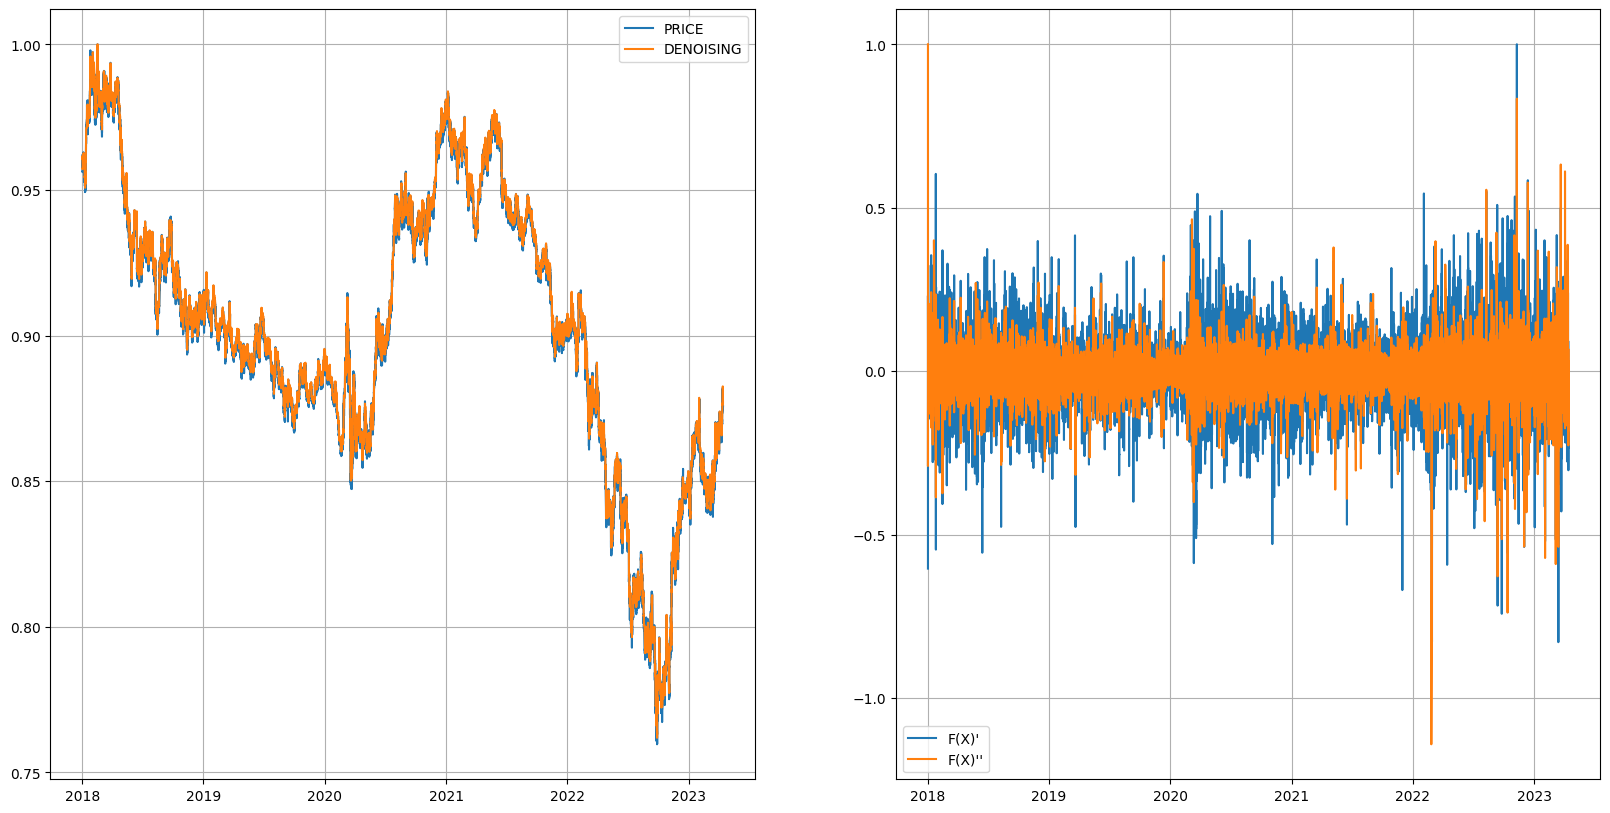

In [38]:
f_1 = np.gradient(df["DENOISED"])
f_2 = np.gradient(f_1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.plot(pd.Series(df["close"].values, index=df["date"]) / df["close"].max())
ax1.plot(pd.Series(df["DENOISED"].values, index=df["date"]) / df["DENOISED"].max())
ax1.legend(["PRICE", "DENOISING"])
ax1.grid()

ax2.plot(pd.Series(f_1, index=df["date"]) / f_1.max())
ax2.plot(pd.Series(f_2, index=df["date"]) / f_2.max())
ax2.legend(["F(X)'", "F(X)''"])
ax2.grid()
plt.show()